In [134]:

import numpy as np
from scipy.optimize import approx_fprime

### Задание 1

Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов

b) 2 локальных экстремума

с) 3 локальных экстремума

d*) область определения функции - 1 точка

__Ответы:__

а) f(x) = sin(x^2) — наверное, тут и должно быть бесконечное число локальных экстремумов 

b) f(x) = 3x^3 + 23x^2 - 3

с) f (x) = 1/6 * x^4 + 3x^3 + x^2 - 3x

d) f(x) = √-x^2 (по идее, тогда область определения только 0 может быть)

### Задание 2

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$

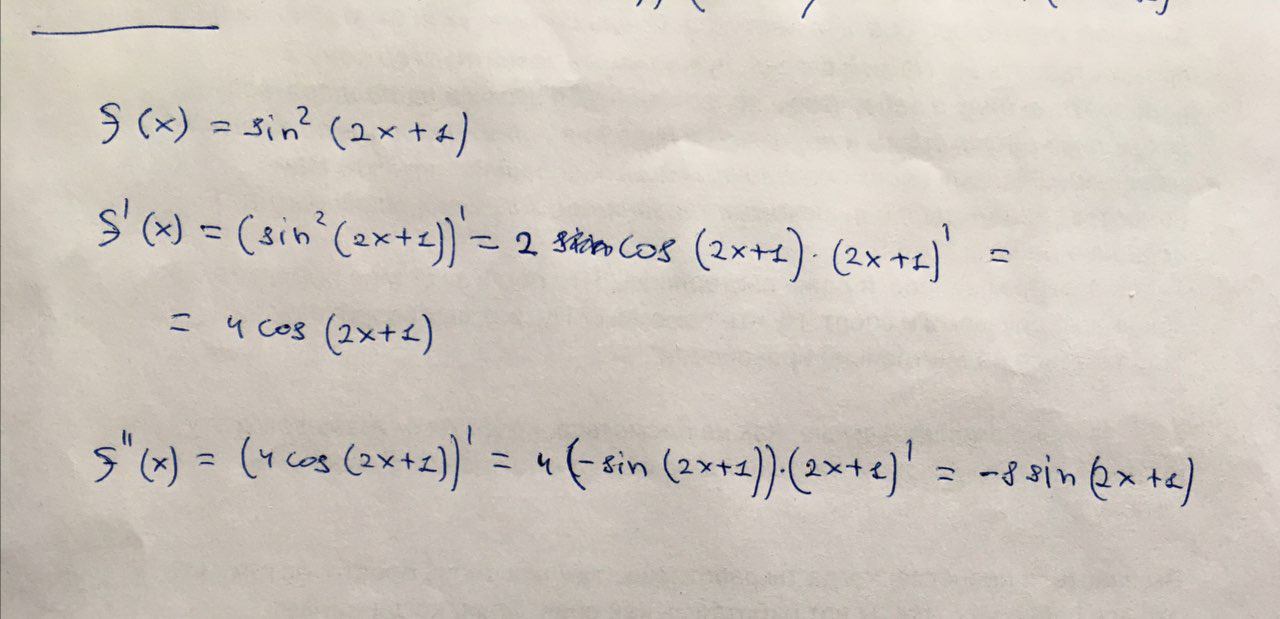

In [135]:
# прямо скажем, уверенности, что я правильно разобрался и вспомнил, как это считается, нет, но что-то такое вроде получилось

from PIL import Image
Image.open('photo_2020-04-25 16.13.51.jpeg')

In [136]:
#и попробовал питоном сделать то же самое по примеру из ноутбука к лекции 

def f(x):
    
    return np.sin(2*x + 1) ** 2

In [137]:
from scipy.misc import derivative
import matplotlib.pyplot as plt

x = np.linspace(-10, 10)
fx = f(x)
f1x = [derivative(f, xx, dx=1e-6, n=1) for xx in x]

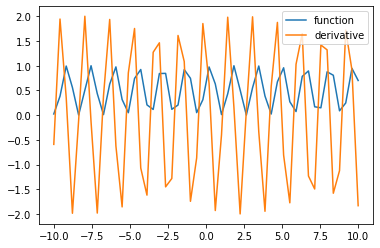

In [138]:
plt.plot(x, fx, label='function')
plt.plot(x, f1x, label='derivative')
plt.legend()
plt.show()

### Задание 3:

Посчитайте частные производные функции в точкe (на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

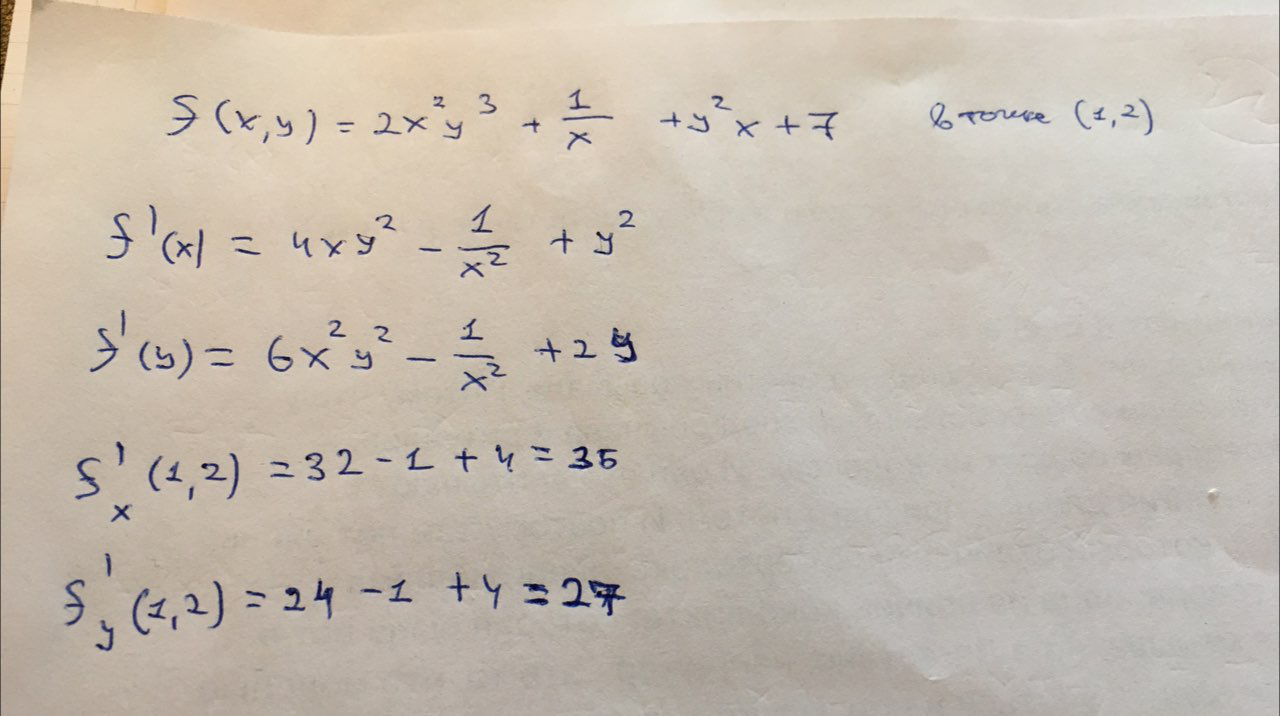

In [139]:
# на бумажке по примеру из лекции получилось что-то такое:

Image.open('photo_2020-04-25 17.54.42.jpeg')

И теперь то же самое с помощью numpy — только кажется, что у меня в бумажном варианте где-то ошибка все же, и по y у меня вышло 27, а не 28 почему-то (но поймать ошибку не могу чего-то)

In [140]:
from scipy.optimize import approx_fprime

In [141]:
def func(x):
    
    "Coordinate vector `x` should be an array of size two."
        
    return 2 * x[0]**2 * x[1]**3 + 1/x[0] + x[1]**2 * x[0] + 7

In [142]:
x = [1,2]
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps])

array([35.00000024, 28.00000024])

### Задание 4:

Градиентный спуск своими руками

In [143]:
def fff(x):
    return (x[0]**2) + (x[1]**2)

In [144]:
x = np.array([100, 200])
lr = 0.1
eps = np.sqrt(np.finfo(float).eps)

In [145]:
for i in range(100):
    
    # Calculate gradient
    grad = approx_fprime(x, fff, [eps, eps])
    
    # Update x with gradient
    x = x - grad * lr

In [146]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", fff(x))

Минимум достигается в:  [1.29197811e-08 3.32901401e-08]
Значение функции в минимуме:  1.2751541739575636e-15


Проверка с помощью встроенной функции numpy:



In [147]:
from scipy.optimize import minimize
res = minimize(fff, [100, 200], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 72
         Function evaluations: 138
